# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 4

Do wykonania laboratorium należy skorzystać z bibliotek:
- [numpy](https://numpy.org/)
- [matplotlib](https://matplotlib.org/)

### Zadanie 1

Dana jest następująca lista prostokątów:

```
rectangles = [("R1", 5, 4.5), ("Szeroki", 11, 3), ("R2", 4, 6), ("Wąski", 3, 8), ("Kwadrat 1", 5, 5), ("Kwadrat 2", 4.5, 4.5)] 
```

gdzie kolejne pola krotek to: 
- nazwa, 
- szerokość, 
- wysokość.

#### A) 
Na jej bazie utwórz ustrukturalizowaną tablicę Numpy (`np.array(...)`), następnie posortuj dane prostokąty rosnąco po polu, a w przypadku równości niech decyduje (alfabetycznie) nazwa prostokąta.

#### B) 
Wypisz posortowaną tablicę, w kolejności pól: 
1. szerokość, 
2. wysokość, 
3. nazwa.

> Uwaga: Gdzie to możliwe, działaj na typach i funkcjach z biblioteki Numpy.



In [1]:
import numpy as np

# a)
rectangles = [("R1", 5, 4.5), ("Szeroki", 11, 3), ("R2", 4, 6), ("Wąski", 3, 8), ("Kwadrat 1", 5, 5), ("Kwadrat 2", 4.5, 4.5)] 
rectangles = np.array(rectangles, dtype=[('name', 'U20'), ('width', np.float_), ('height', np.float_)])

sorted_indexes = np.lexsort([rectangles['name'], rectangles['width'] * rectangles['height']])
sorted_rectangles = rectangles[sorted_indexes]

print(f"{'Name':<20} {'Width':<10} {'Height':<10}")
for rec in sorted_rectangles:
    print(f"{rec['name']:<20} {rec['width']:<10} {rec['height']:<10}")

Name                 Width      Height    
Kwadrat 2            4.5        4.5       
R1                   5.0        4.5       
R2                   4.0        6.0       
Wąski                3.0        8.0       
Kwadrat 1            5.0        5.0       
Szeroki              11.0       3.0       


In [2]:
# b)
sorted_indexes = np.lexsort([rectangles['name'], rectangles['height'], rectangles['width']])
sorted_rectangles = rectangles[sorted_indexes]

print(f"{'Name':<20} {'Width':<10} {'Height':<10}")
for rec in sorted_rectangles:
    print(f"{rec['name']:<20} {rec['width']:<10} {rec['height']:<10}")

Name                 Width      Height    
Wąski                3.0        8.0       
R2                   4.0        6.0       
Kwadrat 2            4.5        4.5       
R1                   5.0        4.5       
Kwadrat 1            5.0        5.0       
Szeroki              11.0       3.0       


### Zadanie 2 - gra 2048

Dana jest kwadratowa plansza o boku `SIZE` (np. 4) dla znanej gry 2048 (https://2048game.com/pl/). 
Każdy wiersz zawiera od 0 do 4 liczb. Należy, z wykorzystaniem konstrukcji Numpy, zasymulować ruch w lewo, w prawo, w górę i w dół planszy zgodnie z regułami gry (ale **BEZ** dodawania nowego kafelka w losowym miejscu). Innymi słowy, trzeba napisać cztery funkcje: 
- `move_left(...)`, 
- `move_right(...)`, 
- `move_up(...)`, 
- `move_down(...)`.

Przykład ruchu w prawo:

Wejściem i wyjściem każdej z obu funkcji jest 2-wymiarowa tablica Numpy.

> UWAGA: postaraj się napisać funkcję tylko do jednego ruchu, a pozostałe trzy niech się do niej w sprytny sposób odwołują.

In [5]:
import matplotlib.pyplot as plt

class Game2048:
    
    possible_numbers = [2**i for i in range(12)]
    
    def __init__(self):
        self.board = np.array([
            [2, 16, 2, 2],
            [8, 0, 0, 4],
            [2, 0, 0, 2],
            [4, 4, 4, 4],
        ])
        
    def move_left(self):
        self._move(0)
        
    def move_right(self):
        self._move(2)
    
    def move_up(self):
        self._move(1)
    
    def move_down(self):
        self._move(3)
    
    def _move(self, k=0):
        """Move tiles in direction specified by k"""
        board = np.rot90(self.board, k)
        for board_row in board:
            new_row = []
            joined = False

            for number in board_row:
                if number == 0:
                    continue
                elif len(new_row) == 0 or new_row[-1] != number or (new_row[-1] == number and joined):
                    new_row.append(number)
                    joined = False
                elif new_row[-1] == number:
                    new_row[-1] += number
                    joined = True

            board_row[:] = 0
            board_row[0:len(new_row)] = new_row
        self.board = np.rot90(board, -k)
    
    def display(self, ax, title=''):
        ax.matshow(self.board, cmap='Blues')
        ax.set_title(title)
        ax.set_yticks([])
        ax.set_xticks([])
        for y in range(self.board.shape[0]):
            for x in range(self.board.shape[1]):
                ax.text(x, y, self.board[y, x], fontsize='xx-large', c='r', horizontalalignment='center', verticalalignment='center')

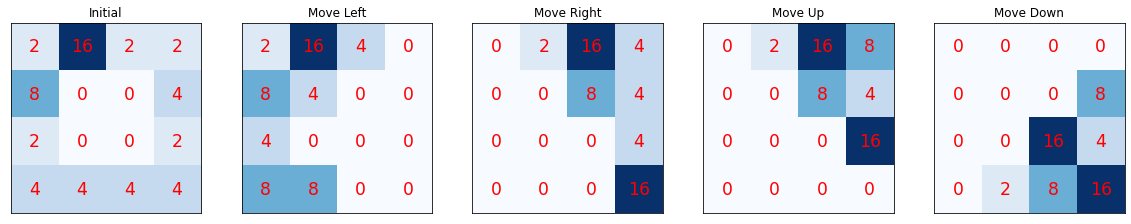

In [4]:
fig, axs = plt.subplots(1, 5, figsize=(20, 3.5))

game = Game2048()
game.display(axs[0], 'Initial')

game.move_left()
game.display(axs[1], 'Move Left')

game.move_right()
game.display(axs[2], 'Move Right')

game.move_up()
game.display(axs[3], 'Move Up')

game.move_down()
game.display(axs[4], 'Move Down')